In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv('../Processes/Interacciones/Interaccion_todasLasSesiones.csv')
a_r = pd.read_csv('../aprobados_reprobados.csv')
resultado = pd.merge(left=data, right=a_r, left_on='Id', right_on='ID',how ='left')

In [4]:
data.shape

(443, 12)

In [5]:
train = data.copy()
#test = data.tail(3)

In [6]:
data.columns

Index(['Sesion', 'Id', 'Study', 'Deeds', 'Texteditor', 'Blank', 'Diagram',
       'Properties', 'Other', 'Aulaweb', 'Fsm', 'Nota'],
      dtype='object')

In [7]:
X=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm', 'Nota']].to_numpy()

In [8]:
X

array([[ 1.,  1.,  1., ...,  9.,  0.,  4.],
       [ 1.,  1.,  1., ..., 14.,  0.,  3.],
       [ 1.,  1.,  1., ..., 19.,  0.,  3.],
       ...,
       [ 1.,  1.,  1., ..., 73.,  1.,  2.],
       [ 1.,  1.,  1., ..., 17.,  1.,  2.],
       [ 1.,  1.,  1., ..., 44.,  1.,  3.]])

In [9]:
X.shape

(443, 10)

### Normalizan los datos

In [10]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
X_std

array([[ 0.21744269, -0.08428696,  0.04756515, ..., -1.14648014,
        -0.57126816,  0.26172459],
       [ 0.21744269, -0.08428696,  0.04756515, ..., -0.96879658,
        -0.57126816, -0.5547824 ],
       [ 0.21744269, -0.08428696,  0.04756515, ..., -0.79111301,
        -0.57126816, -0.5547824 ],
       ...,
       [ 0.21744269, -0.08428696,  0.04756515, ...,  1.12786949,
         1.75049141, -1.37128938],
       [ 0.21744269, -0.08428696,  0.04756515, ..., -0.86218644,
         1.75049141, -1.37128938],
       [ 0.21744269, -0.08428696,  0.04756515, ...,  0.09730481,
         1.75049141, -0.5547824 ]])

### silhouette_score y metodo del codo

In [12]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pylab as plt

/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
train=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']]

In [14]:
def cluster_ac(x, n_clusters, link, aff):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity=aff, linkage=link)
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

In [15]:
def graficarCS(train, link, metodo='calinski_harabasz'):
    aff=['euclidean','cosine','l1','l2']
    for a in aff:
        print('Con link= %s y affinity= %s '%(link,a))
        cluster = AgglomerativeClustering(affinity=a, linkage=link)
        visualizer = KElbowVisualizer(cluster, k=(2,10), metric=metodo, timings=False)
        visualizer.fit(train)        # Fit the data to the visualizer
        visualizer.show()  

Con link= ward y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


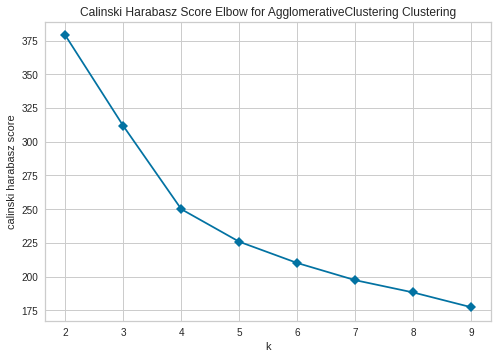

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [16]:
graficarCS(train,'ward')

In [ ]:
graficarCS(train,'ward','silhouette')

Con link= single y affinity= euclidean 


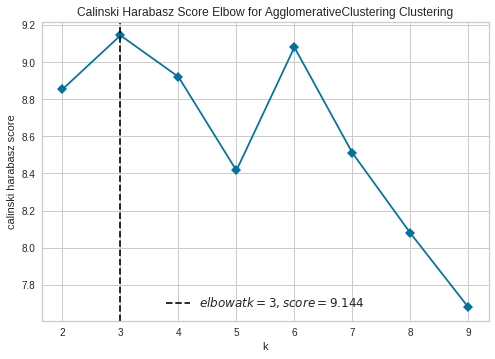

Con link= single y affinity= cosine 


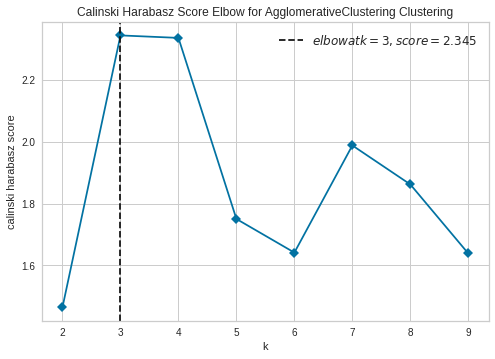

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


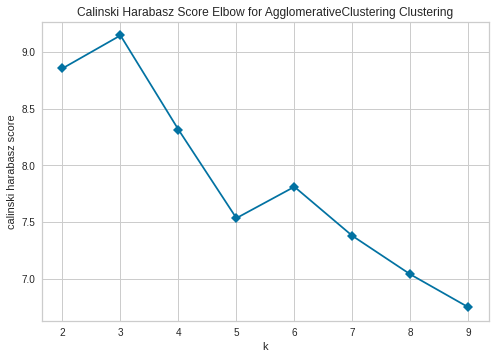

Con link= single y affinity= l2 


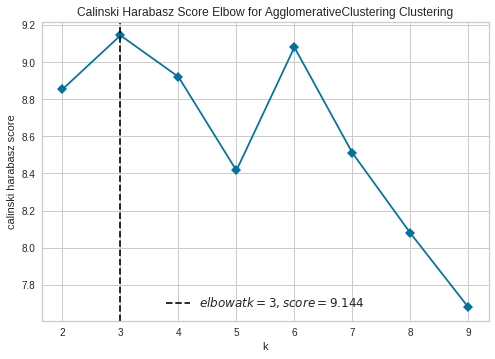

In [17]:
graficarCS(train,'single')

Con link= single y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


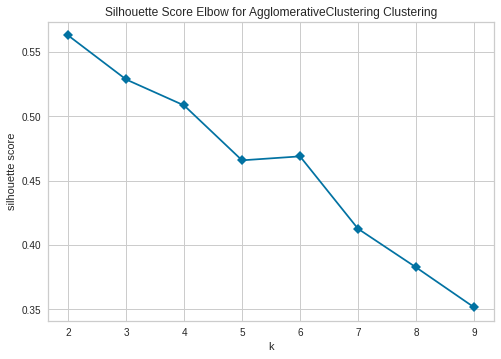

Con link= single y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


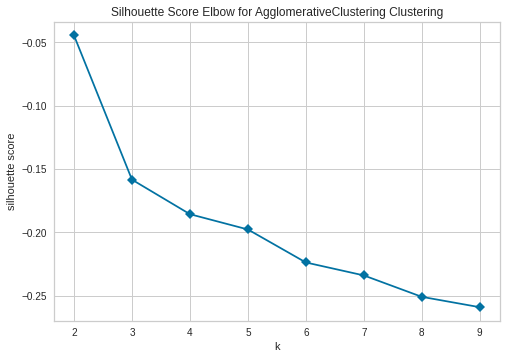

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


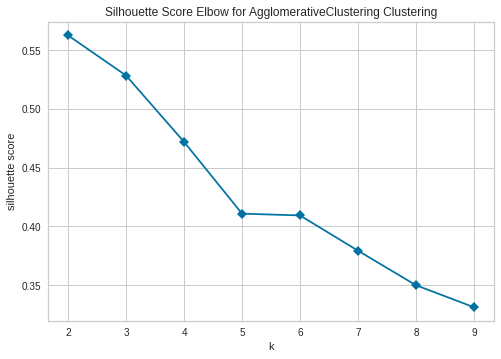

Con link= single y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


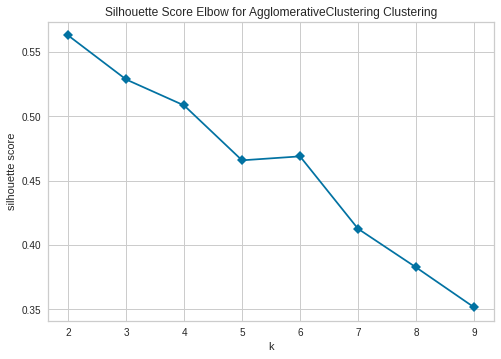

In [18]:
graficarCS(train,'single','silhouette')

Con link= complete y affinity= euclidean 


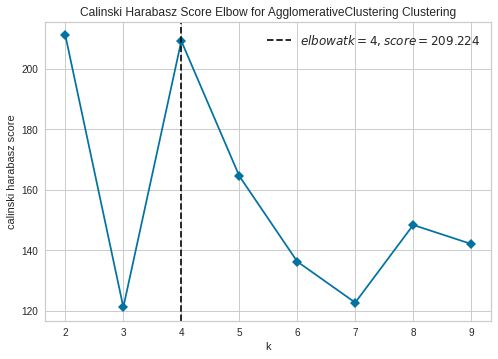

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


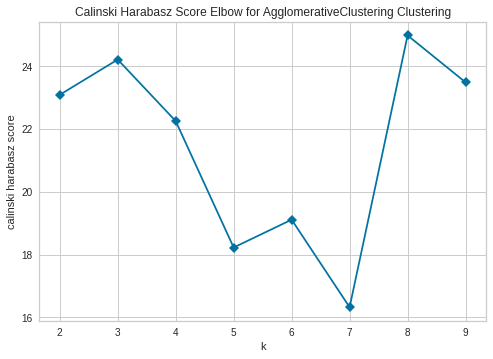

Con link= complete y affinity= l1 


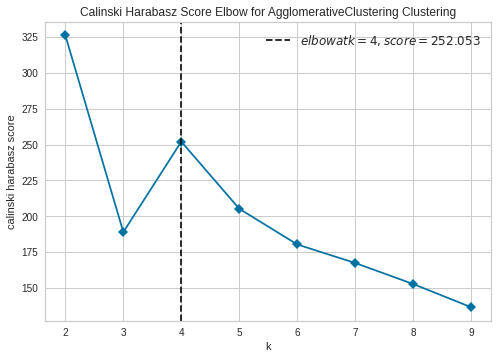

Con link= complete y affinity= l2 


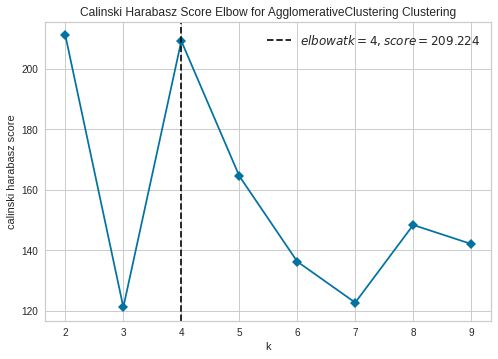

In [19]:
graficarCS(train,'complete')

Con link= complete y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


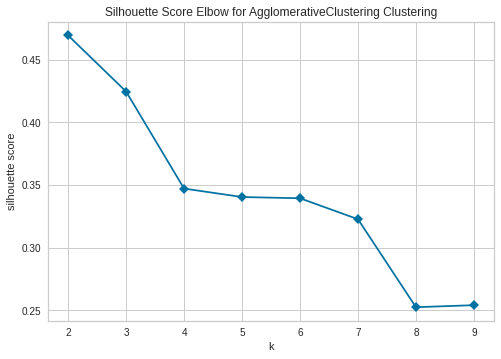

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


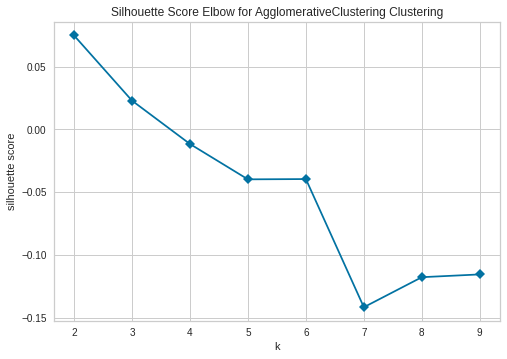

Con link= complete y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


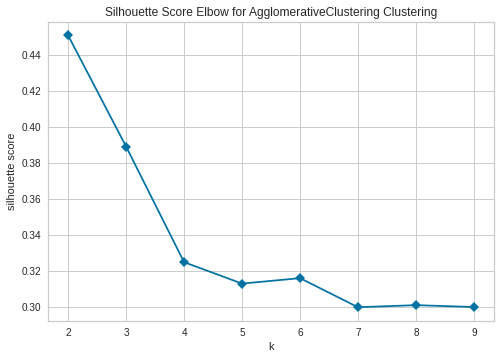

Con link= complete y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


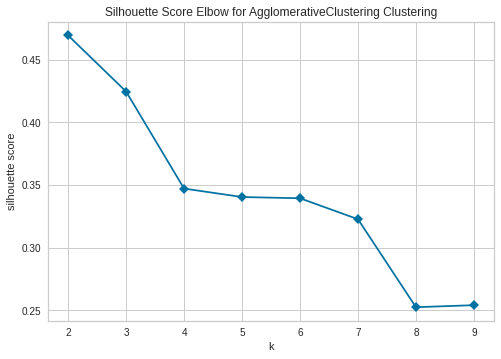

In [20]:
graficarCS(train,'complete','silhouette')

Con link= average y affinity= euclidean 


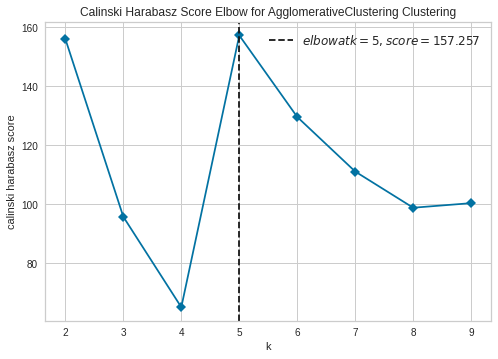

Con link= average y affinity= cosine 


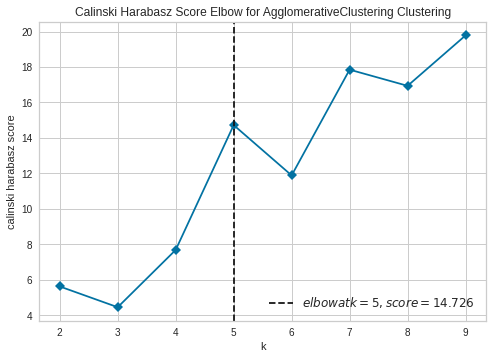

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


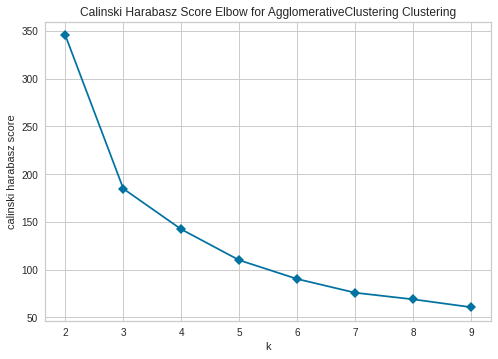

Con link= average y affinity= l2 


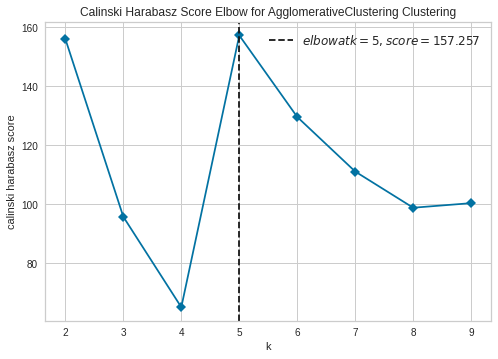

In [21]:
graficarCS(train,'average')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


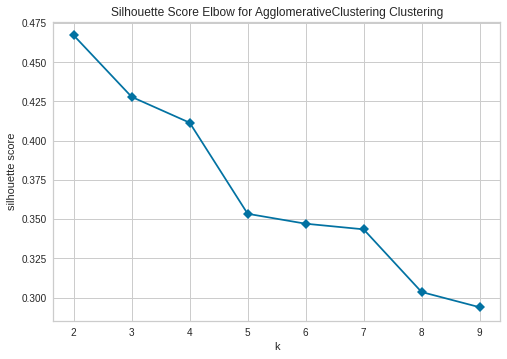

Con link= average y affinity= cosine 


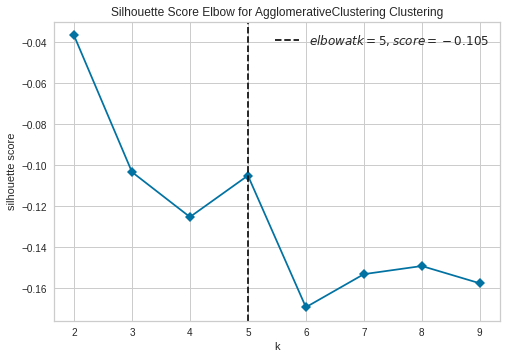

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


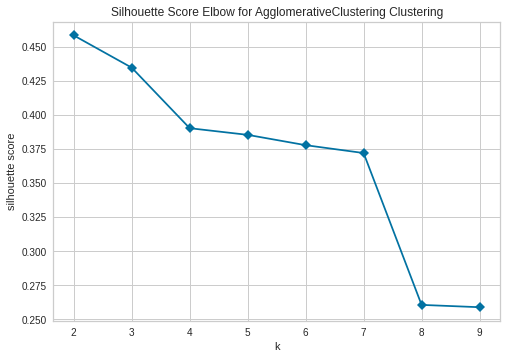

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


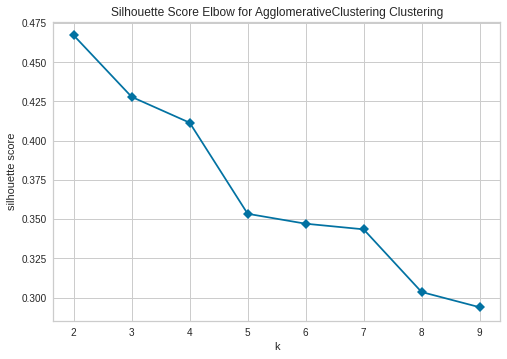

In [22]:
graficarCS(train,'average','silhouette')

## Clustering

In [23]:
## mejores opciones obtenidas de acuerdo al silouhette score
# ward = cluster_ac(train, 6, 'ward', 'euclidean')
# singleE = cluster_ac(train, 5, 'single', 'euclidean')
singleC = cluster_ac(train, 3, 'single', 'cosine')
#singlel2 = cluster_ac(train, 3, 'single', 'l2')
completeE = cluster_ac(train, 4, 'complete', 'euclidean')
# completeC = cluster_ac(train, 5, 'complete', 'cosine')
# averageE = cluster_ac(train, 3, 'average', 'euclidean')
averageC = cluster_ac(train, 5, 'average', 'cosine')
#averagel1 = cluster_ac(train, 7, 'average', 'l1')

## Reducir las dimensiones para visualizar

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


In [26]:
# results = pd.DataFrame(np.column_stack([reducir_dim_tsne(train,2),ward,singleE,singlel1,singlel2,completeC,
#                                         averageE,averageC,averagel2]), 
#                       columns=["x", "y", "AGW", "AGSE", "AGSl1",'AGSl2','AGCC','AGAE','AGAC','AGAl2']) #,completeE , "AGCE"
results = pd.DataFrame(np.column_stack([reducir_dim_tsne(train,2),singleC,completeE,averageC]), 
                      columns=["x", "y",  "AGSC",'AGCE','AGAC'])

## Mostrar los resultados

In [27]:
import seaborn as sns

In [28]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(3,1 , figsize=(20, 50))
    
#     sns.scatterplot(data=res, x="x", y="y", hue="AGW", ax=ax[0], legend="full")
#     ax[0].set_title('AGW')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGSE", ax=ax[1], legend="full")
#     ax[1].set_title('AGSE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSC", ax=ax[0], legend="full")
    ax[0].set_title('AGSC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGCE", ax=ax[1], legend="full")
    ax[1].set_title('AGCE')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCE", ax=ax[4], legend="full")
#     ax[3].set_title('AGCE')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCC", ax=ax[4], legend="full")
#     ax[3].set_title('AGCC')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGAE", ax=ax[5], legend="full")
#     ax[3].set_title('AGAE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAC", ax=ax[2], legend="full")
    ax[2].set_title('AGAC')

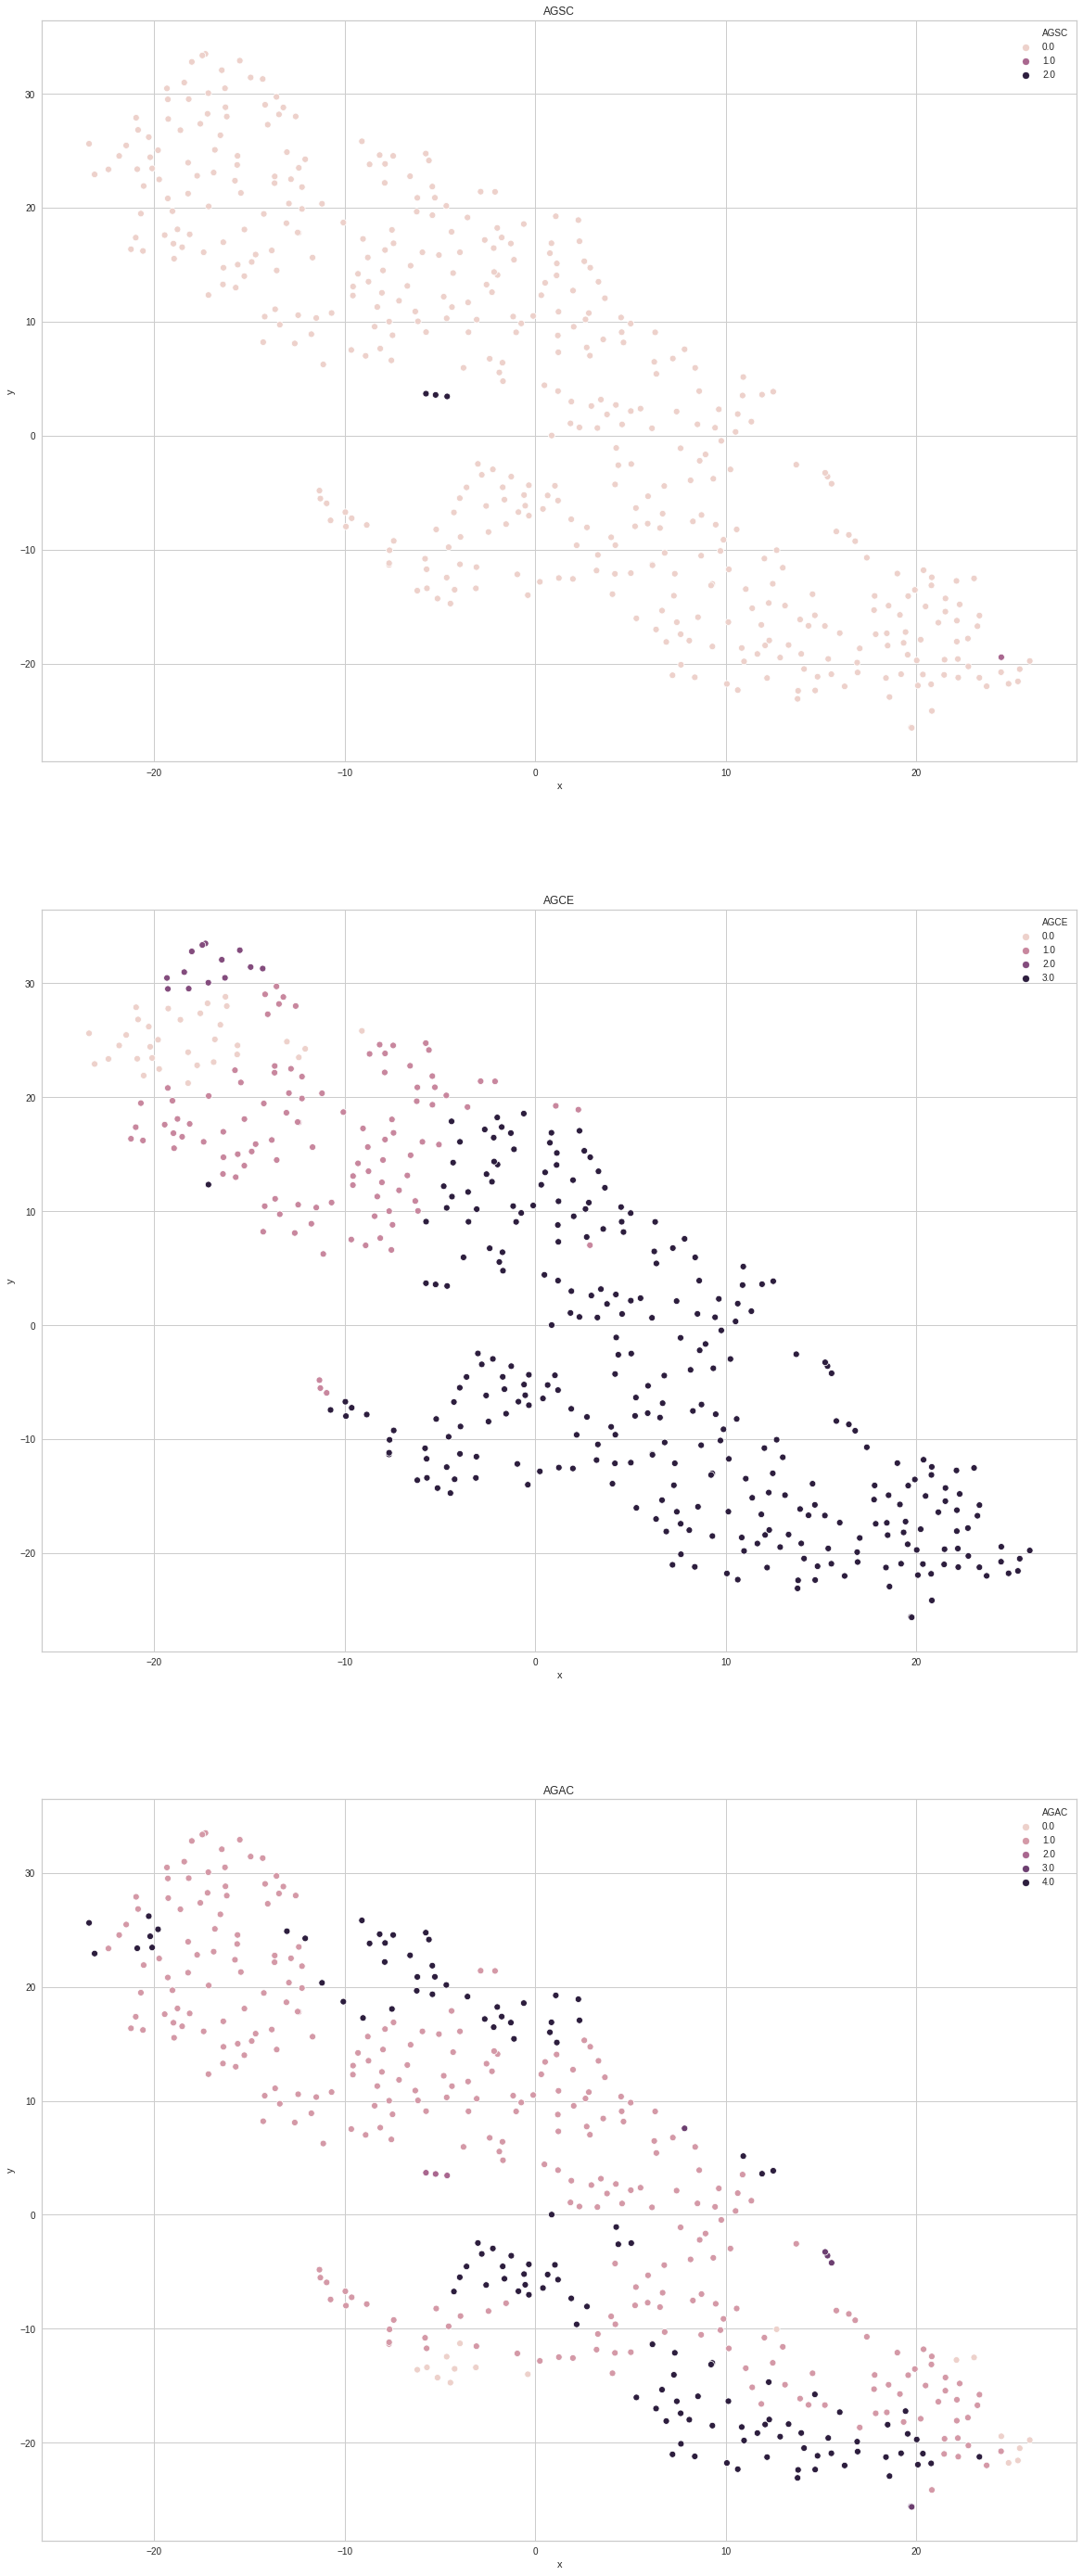

In [29]:
mostrar_resultados(results)

In [30]:
def getElements(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    return dict(zip(unique,counts))

In [31]:
getElements(singleC)

{0: 439, 1: 1, 2: 3}

In [32]:
getElements(completeE)

{0: 32, 1: 105, 2: 13, 3: 293}

In [34]:
#getElements(singlel2)

In [35]:
getElements(averageC)

{0: 17, 1: 293, 2: 3, 3: 6, 4: 124}

## relaciona con aprobados o reprobados

In [44]:
#accuracy_score(ward_c, test)
aprobado = resultado[['aprobar']]

In [45]:
aprobado

,aprobar
0,1
1,0
2,1
3,0
4,0
...,...
438,0
439,1
440,0
441,0


In [46]:
columnas = list(train.columns)+['cluster']+list(aprobado.columns)

In [47]:
len(columnas)

11

In [59]:
union_CE= pd.DataFrame(np.column_stack([train,completeE,aprobado]),columns=columnas)
union_AC =pd.DataFrame(np.column_stack([train,averageC,aprobado]),columns=columnas)

In [60]:
union_CE 

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
0,1.0,1.0,1.0,39.0,16.0,64.0,57.0,9.0,0.0,3.0,1.0
1,1.0,1.0,1.0,27.0,9.0,55.0,36.0,14.0,0.0,3.0,0.0
2,1.0,1.0,1.0,32.0,5.0,60.0,77.0,19.0,0.0,3.0,1.0
3,1.0,1.0,1.0,24.0,10.0,209.0,88.0,21.0,1.0,3.0,0.0
4,1.0,1.0,1.0,49.0,24.0,61.0,83.0,28.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
438,1.0,1.0,1.0,115.0,122.0,216.0,205.0,107.0,1.0,1.0,0.0
439,1.0,1.0,1.0,144.0,217.0,176.0,81.0,0.0,1.0,3.0,1.0
440,1.0,1.0,1.0,218.0,158.0,334.0,191.0,73.0,1.0,0.0,0.0
441,1.0,1.0,1.0,112.0,177.0,229.0,220.0,17.0,1.0,1.0,0.0


In [61]:
getElements(union_CE[['cluster']])

{0.0: 32, 1.0: 105, 2.0: 13, 3.0: 293}

In [57]:
union_CE.groupby(by=['cluster','aprobar']).count()

Study  Deeds  Texteditor  Diagram  Properties  Other  Blank  \
cluster aprobar                                                                
0.0     0.0         16     16          16       16          16     16     16   
        1.0         16     16          16       16          16     16     16   
1.0     0.0         46     46          46       46          46     46     46   
        1.0         59     59          59       59          59     59     59   
2.0     0.0          4      4           4        4           4      4      4   
        1.0          9      9           9        9           9      9      9   
3.0     0.0        153    153         153      153         153    153    153   
        1.0        140    140         140      140         140    140    140   

                 Aulaweb  Fsm  
cluster aprobar                
0.0     0.0           16   16  
        1.0           16   16  
1.0     0.0           46   46  
        1.0           59   59  
2.0     0.0            4    4  
        1.0            9    9  
3.0     0.0          153  153  
        1.0          140  140

In [62]:
union_AC.groupby(by=['cluster','aprobar']).count()

Study  Deeds  Texteditor  Diagram  Properties  Other  Blank  \
cluster aprobar                                                                
0.0     0.0         12     12          12       12          12     12     12   
        1.0          5      5           5        5           5      5      5   
1.0     0.0        141    141         141      141         141    141    141   
        1.0        152    152         152      152         152    152    152   
2.0     0.0          3      3           3        3           3      3      3   
3.0     0.0          4      4           4        4           4      4      4   
        1.0          2      2           2        2           2      2      2   
4.0     0.0         59     59          59       59          59     59     59   
        1.0         65     65          65       65          65     65     65   

                 Aulaweb  Fsm  
cluster aprobar                
0.0     0.0           12   12  
        1.0            5    5  
1.0     0.0          141  141  
        1.0          152  152  
2.0     0.0            3    3  
3.0     0.0            4    4  
        1.0            2    2  
4.0     0.0           59   59  
        1.0           65   65

In [58]:
for i in range(6):
    print(getElements(union[(union_CE['cluster']==i)].aprobar))

{0.0: 16, 1.0: 16}
{0.0: 46, 1.0: 59}
{0.0: 4, 1.0: 9}
{0.0: 153, 1.0: 140}
{}
{}


In [63]:
for i in range(6):
    print(getElements(union[(union_AC['cluster']==i)].aprobar))

{0.0: 12, 1.0: 5}
{0.0: 141, 1.0: 152}
{0.0: 3}
{0.0: 4, 1.0: 2}
{0.0: 59, 1.0: 65}
{}


In [64]:
union_AC[union_AC['cluster']==2]

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
257,0.0,1.0,1.0,51.0,183.0,166.0,13.0,5.0,0.0,2.0,0.0
344,0.0,1.0,1.0,63.0,192.0,229.0,13.0,5.0,0.0,2.0,0.0
430,0.0,1.0,1.0,67.0,225.0,272.0,33.0,5.0,1.0,2.0,0.0
